Name: Akshay Vinayak Sadalgekar - 1001944713

Name: Aaditya Rajendra Damle - 1001955625

Name: Aishwarya Muchandi - 1001879673

# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID: ABC 1001XXXXXX

Second Student Name and ID: XYZ 1001XXXXXX



Notes: When submitting, fill your name and ID in this cell.  [1 point]

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

**Do not upload the database file. Only two files are expected**[-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load titanic.scv dataset from sklearn datasets. [1 points]
* Select best 3 attributes for training and testing your model. [2 points]
* Find the best K using elbow method. Explain what other ways can we use to find the best value of K. [3 points]
* Split your dataset 75% for training, and 25% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers. **Plot the Error rate vs. K-value**.[6 points]
* Plot the classifier in a 2D projection.[3 points]

# Report (22 Points)

For each classification task you need to submit a report (PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. What other 3 attribute can you choose? [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations in 4 - 5 lines. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# for feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
#knn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
# Loading Dataset and Printing first 5 records using head()
excel_file = 'titanic.csv'
dataset = pd.read_csv(excel_file)
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Dimensionality of dataset i.e rows and columns
dataset.shape

(891, 11)

fix imbalance and outlier issues for classificastion

In [4]:
# Printing a concise summary of a DataFrame.
# info method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


After carefully looking at data we decided to drop columns Cabin, Name, Fare, Ticket as it will not play any important role to state the passenger will survive or not : 

In [5]:
# drop least valuable columns from the dataset using .drop()
# with inplace = True , the data will be modified in place and no need to store it again in a varaible
dataset.drop(['Name','Ticket','Cabin',"Fare"], axis=1, inplace=True)

In [6]:
# printing dataset with filtered columns
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [7]:
# Printing a concise summary of a DataFrame.
# info method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
# Using .info() to handle the missing values in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB


- We can see that column Age includes Nan values so we can fill the NaN with mean age.

- Also, column emmbark includes Nan values so it will logical to fill those values with most repeated values from entire dataset as there are families who has embarked from certain ports

In [8]:
# Finding mean value of the column 'Age'
dataset['Age'].mean()

29.69911764705882

In [9]:
# Finding mode of the column 'Embarked'
dataset["Embarked"].mode()

0    S
dtype: object

In [10]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
dataset["Embarked"] = dataset["Embarked"].fillna('S')

In [11]:
# checking for null values using .isnull() and chaining .sum() to get the sum of each null values
dataset.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [12]:
# Getting the dtypes of each columns in the datatset
dataset.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

Observation:

- It is observed that column Sex has object data type and column 'Age' and 'Embarked' has data type which needs to be converted into int for efficient classifier.

In [13]:
# Printing unique values in column 'Age'
dataset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
# Printing unique values in column 'Embarked'
dataset['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
# Using pandas.get_dummies to convert categorical variable of column 'Sex' into dummy variables.
dummy_sex_col = pd.get_dummies(dataset['Sex'],drop_first=True)
dataset=pd.concat([dataset,dummy_sex_col], axis=1)
dataset.drop(['Sex'],axis=1, inplace=True)
dataset.rename({'male': 'Sex'}, axis=1, inplace=True) 

In [16]:
# Creating a dictionary and storing in a variable named ship_ports
# This dictionary contains key's as all unique values in colummn 'Embarked' and values as dummy 0,1,2
ship_ports = {"S": 0, "C": 1, "Q": 2}

# Storing the original dataset as list into a variable named data for easy looping for each entries and mapping each entries
data = [dataset]

# Looping over the 'Embarked' column in the data and mapping each record with new dummy values
# map() is a built-in function that allows to process and transform all the items in an iterable
for dataset in data:
    # storing the new mapped values in the dataset
    dataset['Embarked'] = dataset['Embarked'].map(ship_ports)

In [17]:
# Printing top 5 rows using .head()
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,0,0
3,1,1,35.0,1,0,0,0
4,0,3,35.0,0,0,0,1


Since we are not considering names of the passengers it is feasible to group age's into 
0 = 'babies Age', 
1 = 'Children', 
2= 'Young Adults',
3 ='Middle Age Adults',
4 = 'Old Adults'


In [18]:
# Converting column 'Age' datatype to int using .astype()
dataset['Age'] = dataset['Age'].astype(int)

# Looping over the 'Age' column in the data and mapping each record with new group value
# map() is a built-in function that allows to process and transform all the items in an iterable
for dataset in data:
    #using .loc to access rows and columns by label
    dataset.loc[ dataset['Age'] <= 2, 'Age'] = 0
    dataset.loc[(dataset['Age'] >= 3) & (dataset['Age'] <= 16), 'Age'] = 1
    dataset.loc[(dataset['Age'] >= 17) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] >= 31) & (dataset['Age'] <= 45), 'Age'] = 3
    dataset.loc[ dataset['Age'] >= 45, 'Age'] = 4

# Usinh .value_coumts to get each counts of unique values i.e each count of newly formed age groups
dataset['Age'].value_counts()

2    488
3    202
4    101
1     76
0     24
Name: Age, dtype: int64

In [19]:
# The column 'Sex' datatype is unsigned int i.e uint, so we change it to int using .astype()
dataset['Sex'] = dataset['Sex'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Age       891 non-null    int64
 3   SibSp     891 non-null    int64
 4   Parch     891 non-null    int64
 5   Embarked  891 non-null    int64
 6   Sex       891 non-null    int64
dtypes: int64(7)
memory usage: 48.9 KB


Observation:

We have succesfully converted the dataset in to the format which can be given to classsifier

In [20]:
# Dividing dataset into X attributes and y label
# dropping column 'Survived' from the dataset since it will be our target
X = dataset.drop(labels=['Survived'], axis=1)
y = dataset['Survived']
print('Shape of the X Attributes and y label:')
print('-------------------------------------')
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of the X Attributes and y label:
-------------------------------------
Shape of X: (891, 6)
Shape of y: (891,)


In [21]:
## Feature Selection

To select best 3 attributes we use information gain to find the dependency of features with respect to target y and select with higher values indicating high dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Ref Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html
Ref Link: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [22]:
# Finding best 3 attribute using mutual_info_classif which calculates entropy
# creating mutual_info_classif object by passing X and y and storing it in a variable 'info'
info = mutual_info_classif(X, y)

# printing these values and these values will be between 0-1
info

array([0.07578765, 0.        , 0.01156604, 0.01795642, 0.        ,
       0.14722541])

In [23]:
#  storing the values in a variable named info and printing the values in descending order.
# To find out whihc feature has highest value
# pd. series will convert array into series
info = pd.Series(info)

# passing index as the column names
info.index = X.columns

# sorting the values in descending order and storing them in sort_info variable to print
sort_info= info.sort_values(ascending=False)
print('Features with scores')
print('--------------------')
print(sort_info)

Features with scores
--------------------
Sex         0.147225
Pclass      0.075788
Parch       0.017956
SibSp       0.011566
Age         0.000000
Embarked    0.000000
dtype: float64


Observation:
    
The higher the values it indicates the dependency of that particular feature on the target variable is high.

So it can be consider as our best feature i.e most important feature.

Text(0.5, 1.0, 'Mutual Information Values Per Features')

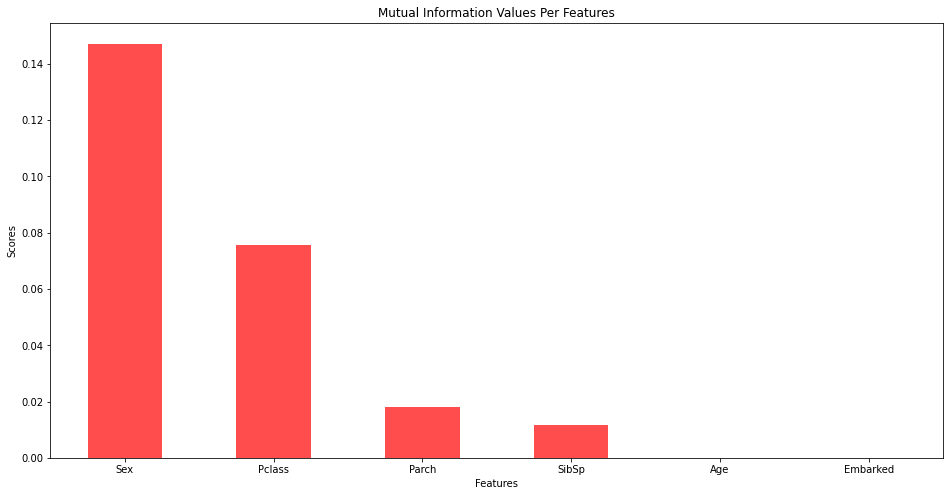

In [24]:
# plotting series data using .plot
# sorted values is stored in a variable name info_bar
info_bar=info.sort_values(ascending=False)

# figure size of the visualization
plt.rcParams["figure.figsize"] = (16,8)
# plotting the bar
info_bar.plot(kind='bar', color='r', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.xticks(rotation = 0)
plt.title('Mutual Information Values Per Features')



In [25]:
# Selecting features according to the k highest scores.
# Selecting features using mutual_info_classif score function and k i.e no of features and we Will select the top 3 important features
# We want best 3 feature
k = 3
# storing best 3 features in the variable names best_three
best_three = SelectKBest(mutual_info_classif,k)
#Running score function on (X, y) using .fit to get features
best_three.fit(X, y)
#using get_support() to get a mask, or integer index, of the features selected.
top_three_feat = X.columns[best_three.get_support()]

# printing top 3 features
print('Top Three Features:')
print('------------------')

# using for loop to print data for better understanding
# c is the counter for indexing which is initialize to 0 and will increment on every iteration
c=0
for i in top_three_feat:
    c = c + 1
    print(c,'Feature: {}'.format(i))
  

Top Three Features:
------------------
1 Feature: Pclass
2 Feature: SibSp
3 Feature: Sex


### Note:
Select K best will always select top features among all available features, several fits on X,y would yield different features everytime.

But, with considering the average of multiple fit on (X,y) we decide to choose our best Three Features as:

    1. Age
    
    2. Sex
    
    3. Embarked

In [26]:
# Creating new X attribute with best 3 featurtes
X_new = X[['Age','Sex','Embarked']]

In [27]:
# Spliting dataset into traing data and testing data
# Spliting the dataset 75% for training, and 25% for testing the classifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,random_state=0)
print('Dimensionality of Train and Test data for X and y')
print('-------------------------------------------------')
print('Shape of X_train:',X_train.shape)
print('Shape of Y_train:',y_train.shape)
print('Shape of X_test:',X_test.shape)
print('Shape of y_test:',y_test.shape)

Dimensionality of Train and Test data for X and y
-------------------------------------------------
Shape of X_train: (668, 3)
Shape of Y_train: (668,)
Shape of X_test: (223, 3)
Shape of y_test: (223,)


In [28]:
# elbow method to determine k value
## Elbow method


# creating a empty error rate list to store the error rates
error_rate = []
# 1-30 is the all possible k values and 30 different iterations for each k value
# we choose 30 because our dataset contains approximately 900 records so square root of 900 is 30
for i in range(1,30):
 
 # Classifier implementing the k-nearest neighbors vote and storing it in variable knn_neigh
 knn_neigh = KNeighborsClassifier(n_neighbors=i)
 # Fitting the k-nearest neighbors classifier from the training dataset.
 knn_neigh.fit(X_train,y_train)
 # Predicting the class labels for the provided data.
 predict = knn_neigh.predict(X_test)
 # appending error rate to the error_list list
 error_rate.append(np.mean( predict != y_test))

Text(0, 0.5, 'Error Rate')

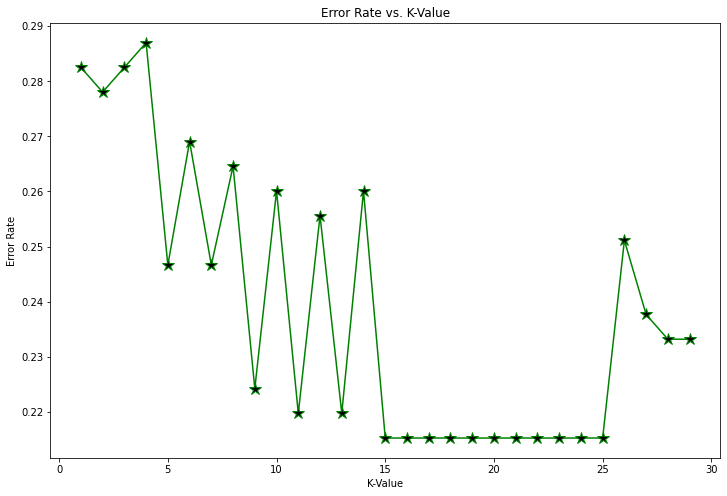

In [29]:
# plotting Error rate vs 
plt.figure(figsize=(12,8))
plt.plot(range(1,30),error_rate,color= 'green', linestyle='solid', marker='*',markerfacecolor='black', markersize=12)
plt.title('Error Rate vs. K-Value')
plt.xlabel('K-Value')
plt.ylabel('Error Rate')



Observation:

- When the K-Value was between 1 to 4 the error rate was very high.

- After K-value 4 the error rate came drastically down and again error rate went up near K-value 14

- But after K-Value 14 the error rate went down and is stable around 0.10 - 0.22, so we can consider best K-value as 15

Along with Elbow method, there are other methods to find best K value are by using:

Silhouette Method
Intercluster Distances
Silhouette Method: The silhouette Method is also a method to find the optimal number of clusters and interpretation and validation of consistency within clusters of data. The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster (cohesion) compared to other clusters (seperation). By providing a succinct graphical representation of how well each object has been classified. This is done by using a formula: s(i)= b(i)-a(i)/max(a(i),b(i));

Intercluster Distances are evaluated using Distance Metrics having their own mathmatical formulae (eg: Minkowiski Distance, Euclidean Distance , Manhattan Distance etc)

In [30]:
#Training the model with k=3 and using euclidean distance to calculate distance
n = 3
knn_neigh=KNeighborsClassifier(n_neighbors=n,metric='euclidean') 
# Fitting the k-nearest neighbors classifier from the training dataset.
knn_neigh.fit(X_train,y_train) 
# Predict the class labels for the provided data.
pred=knn_neigh.predict(X_test)
print('With K=3')
#  the classification Report ti includes:precision, recall, f1-score, and support
print(classification_report(y_test, pred)) 

With K=3
              precision    recall  f1-score   support

           0       0.75      0.83      0.78       139
           1       0.65      0.54      0.59        84

    accuracy                           0.72       223
   macro avg       0.70      0.68      0.69       223
weighted avg       0.71      0.72      0.71       223



In [31]:
# Showcase the result in the confusion matrix
NN_cm = pd.DataFrame(
    confusion_matrix(y_test, pred),
    index = [['Actual', 'Actual'], ['Negative', 'Positive']],
    columns = [['Predicted', 'Predicted'], ['Negative', 'Positive']])
print(NN_cm)

                Predicted         
                 Negative Positive
Actual Negative       115       24
       Positive        39       45


Text(123.0, 0.5, 'Actual Values')

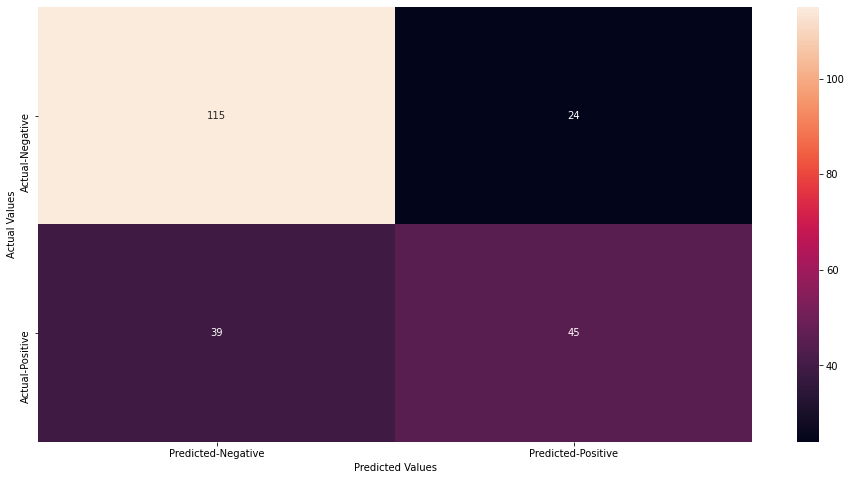

In [32]:
# Using seaborn to make the confusion matrix graphically 
# aesthetic and more intelligible
sns.heatmap(NN_cm, annot = True, fmt=".4g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [33]:
#Training the model with k=5 and using euclidean distance to calculate distance
n = 5
knn_neigh=KNeighborsClassifier(n_neighbors=n,metric='euclidean') 
# Fitting the k-nearest neighbors classifier from the training dataset.
knn_neigh.fit(X_train,y_train) 
# Predict the class labels for the provided data.
pred=knn_neigh.predict(X_test)
print('With K=5')
#  the classification Report ti includes:precision, recall, f1-score, and support
print(classification_report(y_test, pred)) 

With K=5
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       139
           1       0.66      0.70      0.68        84

    accuracy                           0.75       223
   macro avg       0.74      0.74      0.74       223
weighted avg       0.76      0.75      0.75       223



In [34]:
# Showcase the result in the confusion matrix
NN_cm = pd.DataFrame(
    confusion_matrix(y_test, pred),
    index = [['Actual', 'Actual'], ['Negative', 'Positive']],
    columns = [['Predicted', 'Predicted'], ['Negative', 'Positive']])
print(NN_cm)

                Predicted         
                 Negative Positive
Actual Negative       109       30
       Positive        25       59


Text(123.0, 0.5, 'Actual Values')

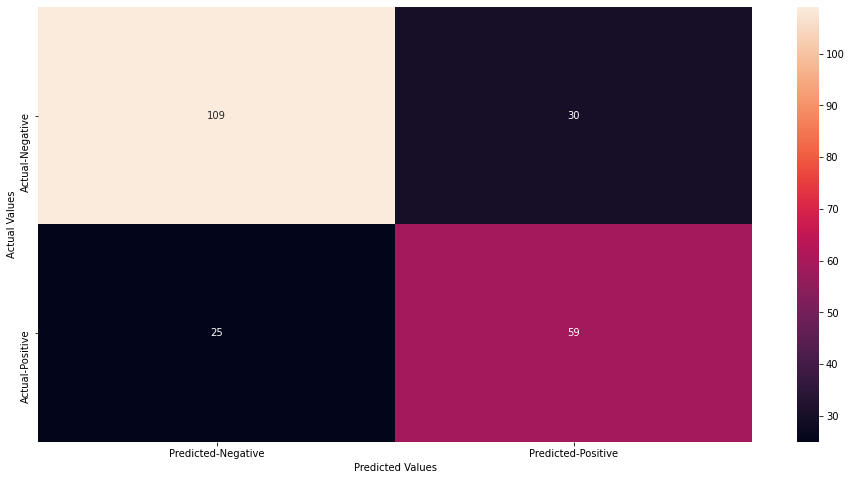

In [35]:
# Using seaborn to make the confusion matrix graphically 
# aesthetic and more intelligible
sns.heatmap(NN_cm, annot = True, fmt=".4g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

In [36]:
#Training the model with k=15 and using euclidean distance to calculate distance
n = 15
knn_neigh=KNeighborsClassifier(n_neighbors=n,metric='euclidean') 
# Fitting the k-nearest neighbors classifier from the training dataset.
knn_neigh.fit(X_train,y_train) 
# Predict the class labels for the provided data.
pred=knn_neigh.predict(X_test)
print('With K=15')
# the classification Report ti includes:precision, recall, f1-score, and support
print(classification_report(y_test, pred)) 

With K=15
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       139
           1       0.71      0.73      0.72        84

    accuracy                           0.78       223
   macro avg       0.77      0.77      0.77       223
weighted avg       0.79      0.78      0.79       223



In [37]:
# Showcase the result in the confusion matrix
NN_cm = pd.DataFrame(
    confusion_matrix(y_test, pred),
    index = [['Actual', 'Actual'], ['Negative', 'Positive']],
    columns = [['Predicted', 'Predicted'], ['Negative', 'Positive']])
print(NN_cm)

                Predicted         
                 Negative Positive
Actual Negative       114       25
       Positive        23       61


Text(123.0, 0.5, 'Actual Values')

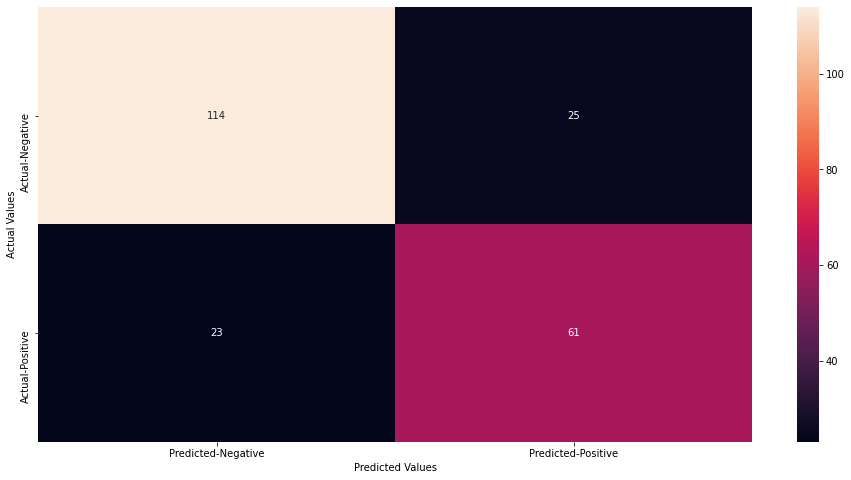

In [38]:
# Using seaborn to make the confusion matrix graphically 
# aesthetic and more intelligible
sns.heatmap(NN_cm, annot = True, fmt=".4g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")